<a href="https://colab.research.google.com/github/amiKaushik/CodeAlpha_Credit_Scoring_Model/blob/main/Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Credit Scoring Model
   + Objective: Predict an individual's creditworthiness using past financial data.
   + Approach: Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.
Key Features:
   + Feature engineering from financial history.
   + Model accuracy assessment using metrics like Precision, Recall, F1-Score, ROC-AUC.
   + Dataset could include: income, debts, payment history, etc

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_ProjectDatasets/german.data-numeric', delim_whitespace=True, header=None)

/tmp/ipython-input-1120088913.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_ProjectDatasets/german.data-numeric', delim_whitespace=True, header=None)


In [4]:
feature_names = [
    "Status of existing checking account",
    "Duration in months",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate % of income",
    "Personal status and sex",
    "Other debtors / guarantors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits at this bank",
    "Job",
    "Number of dependents",
    "Telephone",
    "Foreign worker",
    "Attribute 21",
    "Attribute 22",
    "Attribute 23",
    "Attribute 24",
    "Target"
]

In [5]:
df.shape

(1000, 25)

In [6]:
df.columns

Index(['Status of existing checking account', 'Duration in months',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since', 'Installment rate % of income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of dependents', 'Telephone', 'Foreign worker', 'Attribute 21',
       'Attribute 22', 'Attribute 23', 'Attribute 24', 'Target'],
      dtype='object')

In [7]:
df.head()

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate % of income,Personal status and sex,Other debtors / guarantors,...,Number of existing credits at this bank,Job,Number of dependents,Telephone,Foreign worker,Attribute 21,Attribute 22,Attribute 23,Attribute 24,Target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [8]:
X = df.drop("Target", axis=1)
y = df["Target"]


In [9]:
y.unique()

array([1, 2])

In [10]:
# Convert target: 1=Good, 2=Bad -> 1=Good, 0=Bad
y = y.map({1: 1, 2: 0})

In [11]:
print("Unique Output Values: ",y.unique())
print("Target distribution:\n", y.value_counts())

Unique Output Values:  [1 0]
Target distribution:
 Target
1    700
0    300
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
lg_scores = cross_val_score(
    LogisticRegression(max_iter=1000),
    X_scaled, y, cv=kfold, scoring='roc_auc'
)

In [18]:
print("Logistic Regression ROC-AUC per fold:", lg_scores)
print("Logistic Regression Mean ROC-AUC:", lg_scores.mean())

Logistic Regression ROC-AUC per fold: [0.785      0.74988095 0.79642857 0.81083333 0.80488095]
Logistic Regression Mean ROC-AUC: 0.7894047619047619


In [19]:
rf_scores = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_scaled, y, cv=kfold, scoring='roc_auc'
)

In [20]:
print("\nRandom Forest ROC-AUC per fold:", rf_scores)
print("Random Forest Mean ROC-AUC:", rf_scores.mean())


Random Forest ROC-AUC per fold: [0.80952381 0.77589286 0.76279762 0.8177381  0.80815476]
Random Forest Mean ROC-AUC: 0.7948214285714286


In [21]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [24]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

In [25]:
evaluate_model(lg_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")


===== Logistic Regression =====
Confusion Matrix:
 [[ 31  29]
 [ 26 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53        60
           1       0.80      0.81      0.81       140

    accuracy                           0.72       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.72      0.72      0.72       200

ROC-AUC Score: 0.7492857142857143

===== Random Forest =====
Confusion Matrix:
 [[ 28  32]
 [ 15 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.47      0.54        60
           1       0.80      0.89      0.84       140

    accuracy                           0.77       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200

ROC-AUC Score: 0.8044047619047618


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [27]:
def plot_roc(models, X_test, y_test):
    plt.figure(figsize=(7,5))

    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

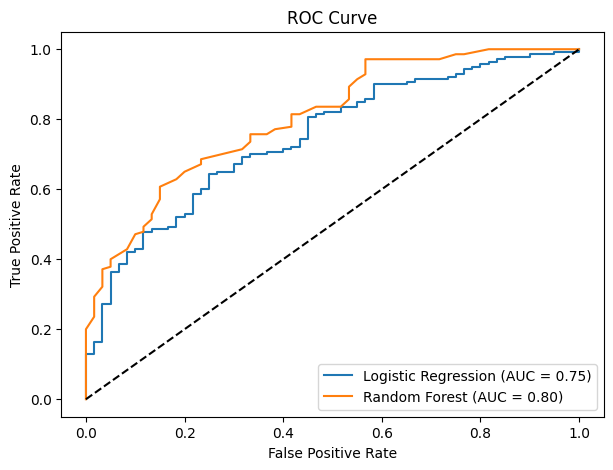

In [28]:
plot_roc({"Logistic Regression": lg_model, "Random Forest": rf_model}, X_test, y_test)

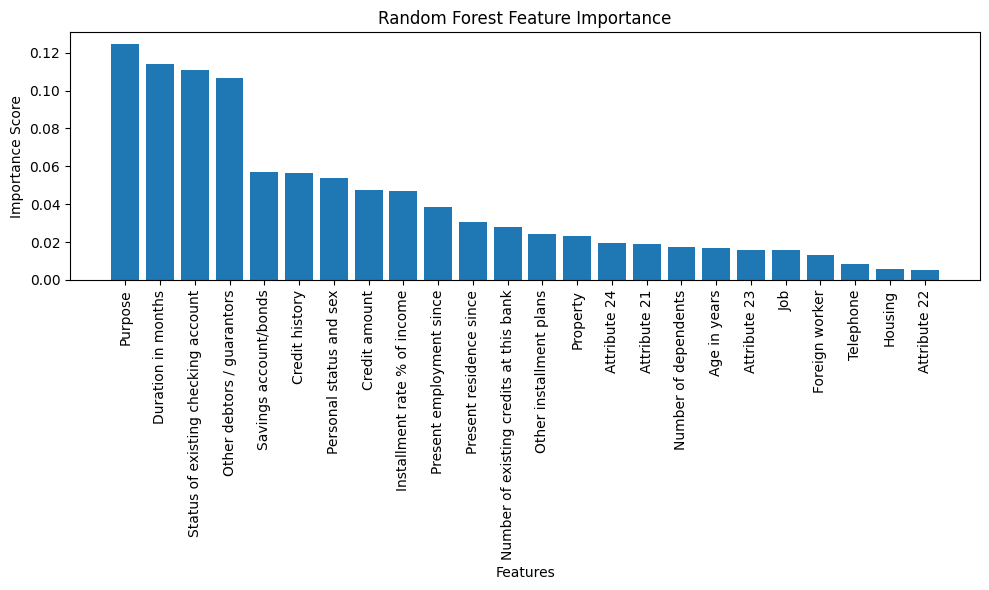

In [29]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
